copy from https://blog.naver.com/ckdgus1433/221443838135

# 모듈 임포팅

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

# 데이터 로딩

In [2]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Normalization

In [3]:
# 데이터 정규화
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

# Flattening

In [4]:
train_x = np.reshape(train_x, (len(train_x), 784))
test_x = np.reshape(test_x, (len(test_x), 784))

# 랜덤 삭제

In [5]:
# 원본데이터를 랜덤하게 지움
noisy_train_x = train_x * np.random.randint(2, size=train_x.shape) 
noisy_test_x = test_x * np.random.randint(2, size=test_x.shape) 


# 랜덤 삭제된 영상 보기

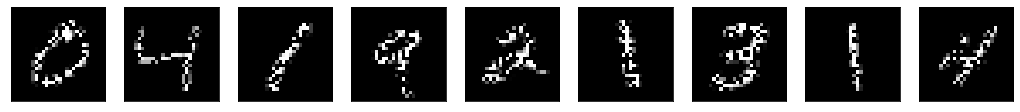

In [6]:
# 랜덤 삭제된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(noisy_train_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 모델 정의와 학습 실행

In [7]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(noisy_train_x, train_x, epochs=100, batch_size=256, validation_split=0.1, shuffle=True)

Epoch 1/100
211/211 [==============================] - 5s 6ms/step - loss: 0.2764 - val_loss: 0.1923
Epoch 2/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1741 - val_loss: 0.1605
Epoch 3/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1531 - val_loss: 0.1473
Epoch 4/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1434 - val_loss: 0.1403
Epoch 5/100
211/211 [==============================] - 2s 8ms/step - loss: 0.1372 - val_loss: 0.1350
Epoch 6/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1332 - val_loss: 0.1318
Epoch 7/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1299 - val_loss: 0.1292
Epoch 8/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1272 - val_loss: 0.1267
Epoch 9/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1247 - val_loss: 0.1248
Epoch 10/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1226 - val_lo

# 결과 확인

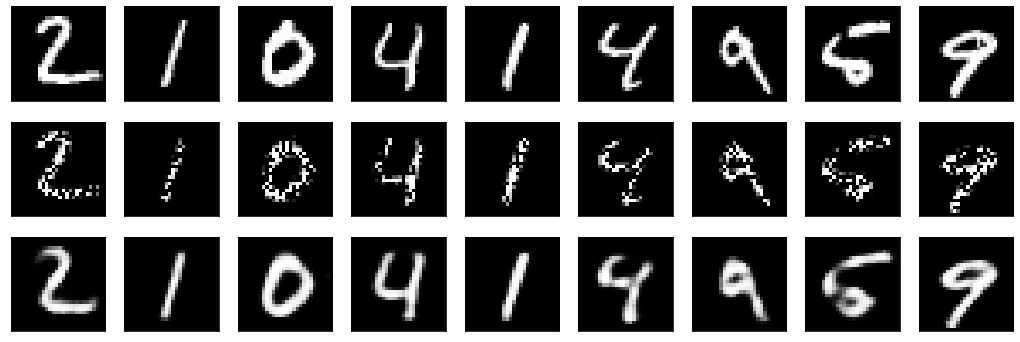

In [8]:
decoded_imgs = model.predict(noisy_test_x)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 랜덤 제거된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(noisy_test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 복구된 것
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()